In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [7]:
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.shape

(569, 33)

In [12]:
if not df.empty:
    df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']

    print("\nShape of features (X):", X.shape)
    print("Shape of target (y):", y.shape)


Shape of features (X): (569, 30)
Shape of target (y): (569,)


In [13]:
df.shape

(569, 31)

In [14]:
if not df.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nData has been split and scaled successfully.")


Data has been split and scaled successfully.


In [15]:
if not df.empty:
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

    print("\nLogistic Regression model trained successfully.")


Logistic Regression model trained successfully.



Confusion Matrix:
[[70  1]
 [ 2 41]]


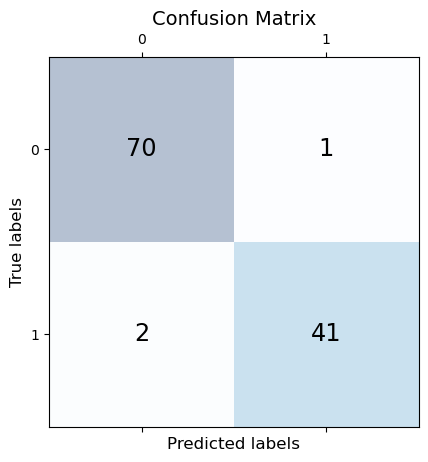

Precision: 0.9762
Recall: 0.9535


In [16]:
if not df.empty:
    y_pred = model.predict(X_test_scaled)

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Visualizing the Confusion Matrix
    fig, ax = plt.subplots()
    mat = ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()


    # 2. Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")


ROC-AUC Score: 0.9974


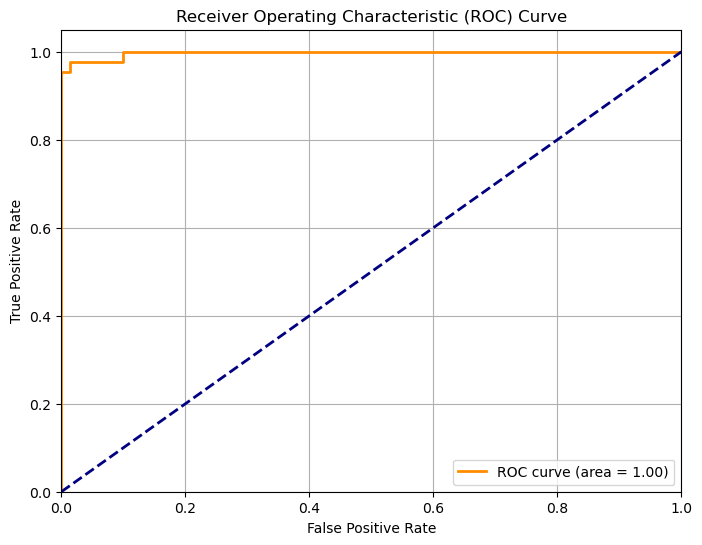

In [17]:
if not df.empty:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC-AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {auc:.4f}")

    # Calculate FPR, TPR for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<b>Sigmoid function - </b>

Logistic regression doesn't output a 0 or 1 directly. Instead, it calculates a score (a real-valued number) and passes it through
a sigmoid function to produce a probability between 0 and 1.

The sigmoid function's formula is:
           Sigmoid(z) = S(z) = 1/(1 + e ^ (-z)) 
              Where z is the linear combination of inputs (z = w1x1 + w2x2 +...+ wnxn + b).

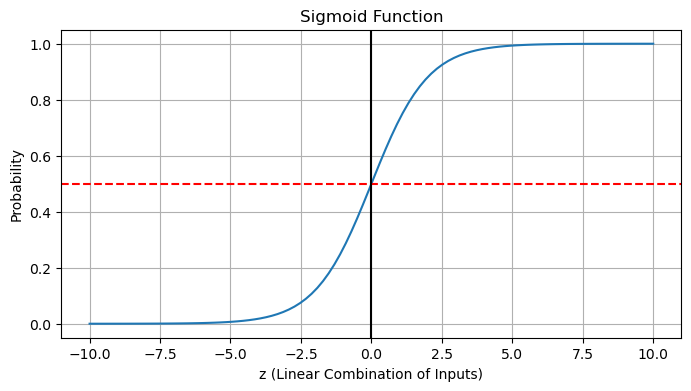

In [18]:
# Plotting the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.figure(figsize=(8, 4))
plt.plot(z, s)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination of Inputs)")
plt.ylabel("Probability")
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='k', linestyle='-')
plt.show()

In [19]:
if not df.empty:
    y_probs = model.predict_proba(X_test_scaled)[:, 1]

    #Threshold = 0.3 (Optimizing for Recall)
    new_threshold_recall = 0.3
    y_pred_recall = (y_probs >= new_threshold_recall).astype(int)

    cm_recall = confusion_matrix(y_test, y_pred_recall)
    precision_recall = precision_score(y_test, y_pred_recall)
    recall_recall = recall_score(y_test, y_pred_recall)

    print(f"\nResults for Threshold = {new_threshold_recall}")
    print("Confusion Matrix:\n", cm_recall)
    print(f"Precision: {precision_recall:.4f}")
    print(f"Recall: {recall_recall:.4f}\n")


    #Threshold = 0.7 (Optimizing for Precision)
    new_threshold_precision = 0.7
    y_pred_precision = (y_probs >= new_threshold_precision).astype(int)

    cm_precision = confusion_matrix(y_test, y_pred_precision)
    precision_precision = precision_score(y_test, y_pred_precision)
    recall_precision = recall_score(y_test, y_pred_precision)

    print(f"\nResults for Threshold = {new_threshold_precision}")
    print("Confusion Matrix:\n", cm_precision)
    print(f"Precision: {precision_precision:.4f}")
    print(f"Recall: {recall_precision:.4f}")


Results for Threshold = 0.3
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision: 0.9130
Recall: 0.9767


Results for Threshold = 0.7
Confusion Matrix:
 [[71  0]
 [ 2 41]]
Precision: 1.0000
Recall: 0.9535
